In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
wisconsin = datasets.load_breast_cancer()
print(wisconsin.keys())
X = wisconsin.data
y = wisconsin.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
seed = 1902

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [ ]:
def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
        print(f"Results for model with K = {n}")
        test_model(x_train, y_train, x_test, y_test, knn)
    return results

Results for model with K = 1
Balanced accuracy: 0.9253430185633575
	F1 = 0.9411764705882352
	Accuracy = 0.9300699300699301
		class 0: 0.8983050847457628
		class 1: 0.9523809523809523
Results for model with K = 2
Balanced accuracy: 0.9100080710250202
	F1 = 0.9212121212121211
	Accuracy = 0.9090909090909091
		class 0: 0.9152542372881356
		class 1: 0.9047619047619048
Results for model with K = 3
Balanced accuracy: 0.9253430185633575
	F1 = 0.9411764705882352
	Accuracy = 0.9300699300699301
		class 0: 0.8983050847457628
		class 1: 0.9523809523809523
Results for model with K = 4
Balanced accuracy: 0.9193906376109766
	F1 = 0.9349112426035503
	Accuracy = 0.9230769230769231
		class 0: 0.8983050847457628
		class 1: 0.9404761904761905
Results for model with K = 5
Balanced accuracy: 0.9253430185633575
	F1 = 0.9411764705882352
	Accuracy = 0.9300699300699301
		class 0: 0.8983050847457628
		class 1: 0.9523809523809523
Results for model with K = 6
Balanced accuracy: 0.9193906376109766
	F1 = 0.9349112426

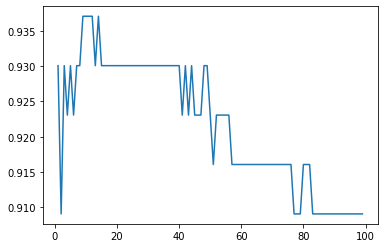

In [ ]:
output = knn(X_train, y_train, X_test, y_test, 100)
n_range = range(1,100)

plt.plot(n_range, output)

As we can see in the plot above; best  results are situated around k=10, so we can rerun our range, but for a smaller amount of k:


In [ ]:
output = knn(X_train, y_train, X_test, y_test, 15)
n_range = range(1,15)

plt.plot(n_range, output)

Optimal results  are obtained for k=9, 10, 11, 12, 14 so lets check out the accuracy scores:

In [ ]:
print(output[9:14])

[0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9370629370629371]


In [ ]:
def test_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy: {}".format(bal_acc))
    print_metrics(y_pred, y_test)



# Calculates the per-class accuracy given predicted and true output labels.
def class_accs(y_pred, y_true):
    acc0 = ((y_pred == y_true) & (y_true == 0)).sum() / (y_true == 0).sum()
    acc1 = ((y_pred == y_true) & (y_true == 1)).sum() / (y_true == 1).sum()
    return acc0, acc1

# Prints a summary of performance metrics given predicted and true output labels.
def print_metrics(y_pred, y_true):
    f1 = metrics.f1_score(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    acc0, acc1 = class_accs(y_pred, y_true)
    print(f'\tF1 = {f1}')
    print(f'\tAccuracy = {acc}')
    print(f'\t\tclass 0: {acc0}')
    print(f'\t\tclass 1: {acc1}')

In [ ]:

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

test_model(X_train, y_train, X_test, y_test, knn)

Balanced accuracy: 0.9312953995157385
	F1 = 0.9473684210526316
	Accuracy = 0.9370629370629371
		class 0: 0.8983050847457628
		class 1: 0.9642857142857143


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5161fece-8ef6-4825-9ea6-16ebba884483' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>